In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'SampleSuperstore.csv')
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
for i in df.select_dtypes(include='object').columns:
    print(f"Column: {i}")
    print(df[i].value_counts())
    print("-"*50)

Column: Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
--------------------------------------------------
Column: Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
--------------------------------------------------
Column: Country
United States    9994
Name: Country, dtype: int64
--------------------------------------------------
Column: City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Glenview           1
Missouri City      1
Manhattan          1
Abilene            1
Pensacola          1
Name: City, Length: 531, dtype: int64
--------------------------------------------------
Column: State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio            

From above output we observe that City, State, Sub-Category has huge value count

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


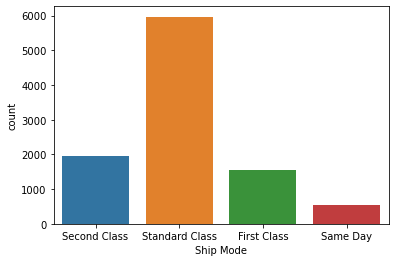

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


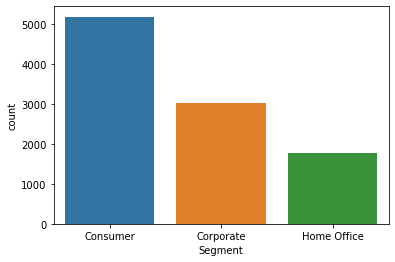

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


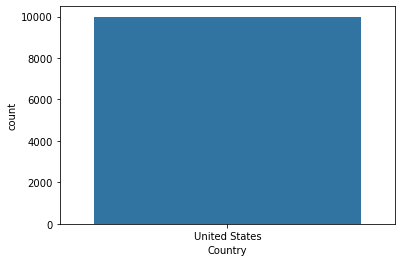

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


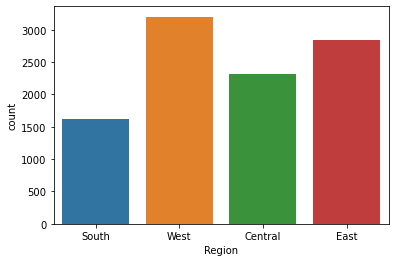

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


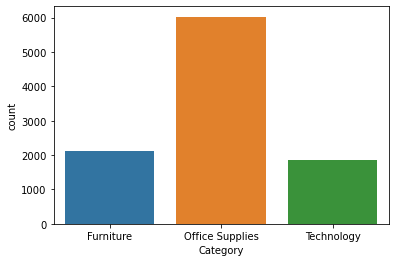

In [6]:
for col in ['Ship Mode', 'Segment', 'Country', 'Region', 'Category']:
    sns.countplot(df[col])
    plt.show()

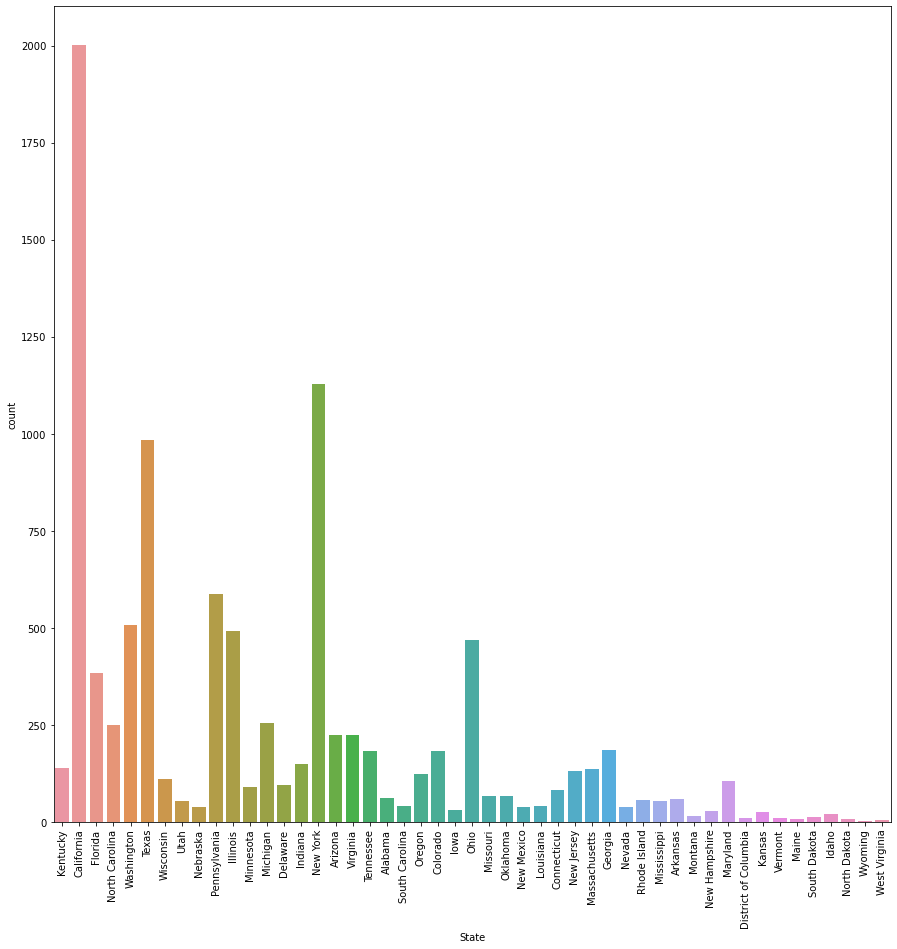

In [7]:
plt.figure(figsize=(15, 15))
sns.countplot(data=df, x='State')
plt.xticks(rotation=90)
plt.show()

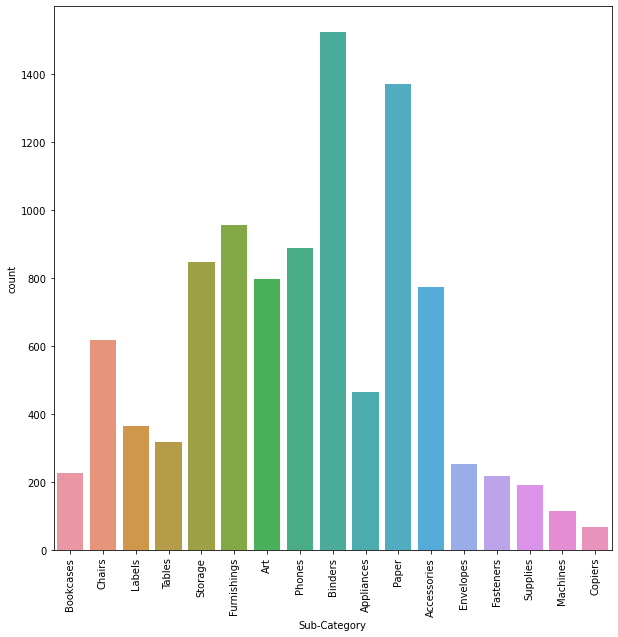

In [8]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Sub-Category')
plt.xticks(rotation=90)
plt.show()

We observe that Country has all same values and postal code has no use in our dataset, so we can discard that value

In [9]:
print(f"Initially: {df.shape}")
df = df.drop(['Country', 'Postal Code'], axis=1)
print(f"Later: {df.shape}")

Initially: (9994, 13)
Later: (9994, 11)


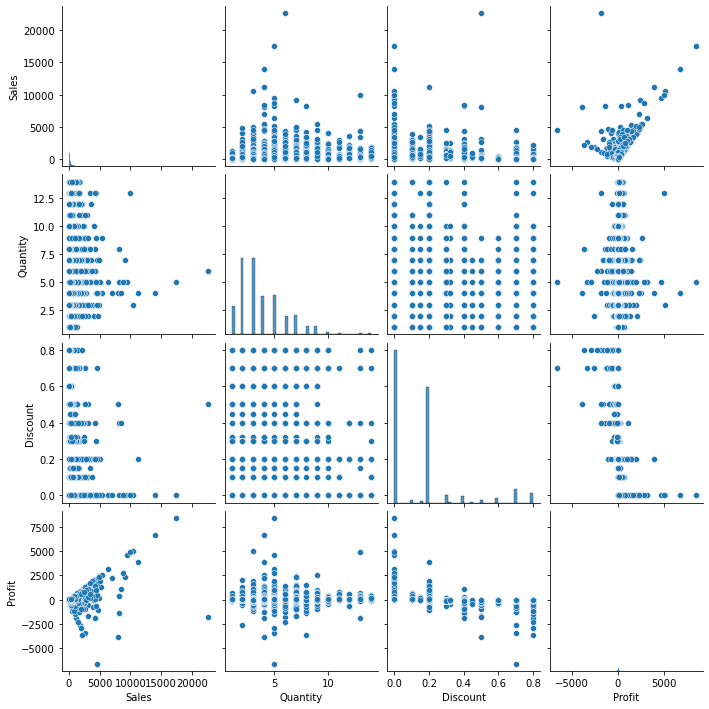

In [10]:
sns.pairplot(df)

<AxesSubplot:>

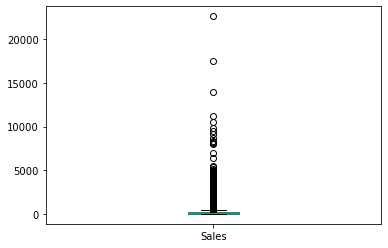

In [11]:
df['Sales'].plot.box()

<AxesSubplot:>

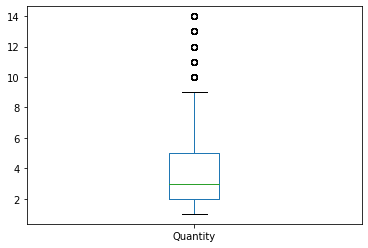

In [12]:
df['Quantity'].plot.box()

<AxesSubplot:>

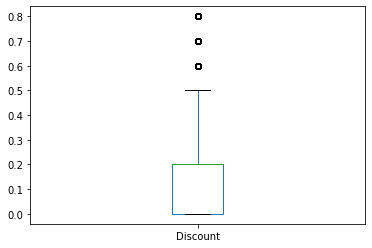

In [13]:
df['Discount'].plot.box()

<AxesSubplot:>

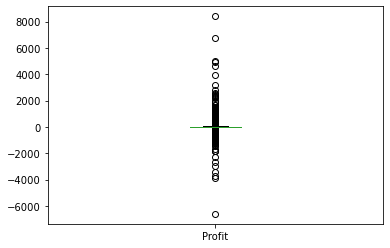

In [14]:
df['Profit'].plot.box()

<AxesSubplot:>

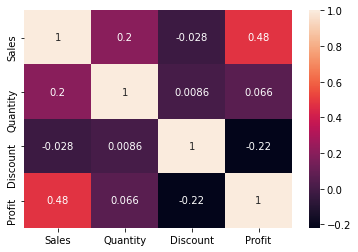

In [15]:
sns.heatmap(df.corr(), annot=True)

### Observation
1. Most of our customers belongs to Standard Class
2. Around 60% of customers are from Office Supplies category
3. Majority customers are Consumers
4. Customers from top 3 cities are California, New Yotk & Texas
5. Most products sold are Binders, Papers & Furnishing from Sub-Category